In [1]:
# import PyBEAM's default module
import pybeam.default as pbd


In [2]:
# define model
model = {'type' : 'base',   # model type ('base' or 'ugm')
        'sigma' : 1.0,      # sets sigsma, the noise parameter
    'threshold' : 'linear', # sets threshold type (fixed, linear, exponential, or weibull)
      'leakage' : False,    # if True, drift rate has leaky integration
        'delay' : False,    # if True, decision threshold motion is delayed (only for non-fixed thresholds)
'contamination' : False}    # if True, uniform contamination added ot model

# outputs which keys your model uses for dictionary phi
pbd.parse_model(model)


['t_nd', 'w', 'mu', 'a', 'm']

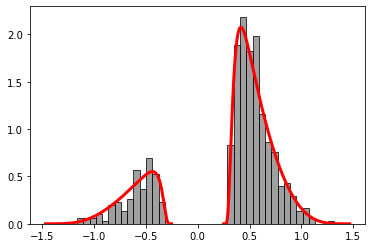

In [3]:
# parameters for synthetic data
phi = {'t_nd' : 0.25, # non-decision time
          'w' : 0.5,  # relative start point
         'mu' : 1.0,  # drift rate
          'a' : 0.75,
          'm' : 0.5}  # decision threshold location

# generate synthetic data
rt = pbd.simulate_model(N_sims = 500,   # number of data points to simulate
                         model = model, # dictionary containing model information
                           phi = phi)   # parameters used to simulate data

# plot synthetic data and model rt distributions
pbd.plot_rt(model = model, # dictionary containing model information 
              phi = phi,   # parameters used for model rt distribution
               rt = rt);   # dictionary of simulated rt data


In [4]:
# define model priors
p = {'pt_nd' : 'Uniform("t_nd", lower = 0.0, upper = 0.75)', # non-decision time prior
        'pw' : 'Uniform("w", lower = 0.3, upper = 0.7)', # relative start point prior
       'pmu' : 'Uniform("mu", lower = -5.0, upper = 5.0)', # drift rate prior
        'pa' : 'Uniform("a", lower = 0.25, upper = 2.0)', # decision threshold prior
        'pm' : 'Uniform("m", lower = 0.0, upper = 3.0)'} # decision threshold prior

# define model condition
c = {'rt' : rt,      # dictionary containing reaction time data
   't_nd' : 'pt_nd', # prior for non-decision time, references p['pt_nd']
      'w' : 'pw',    # prior for relative start point, references p['pw']
     'mu' : 'pmu',   # prior for the drift rate, references p['pmu']
      'a' : 'pa',
      'm' : 'pm'}    

# load conditions into dictionary
cond = {0 : c}

# run parameter inference
trace = pbd.inference(model = model,
                     priors = p,
                 conditions = cond,
                    samples = 25000,
                     chains = 3,
                      cores = 3,
                  file_name = 'linear')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [m, a, mu, w, t_nd]


Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 57 seconds.


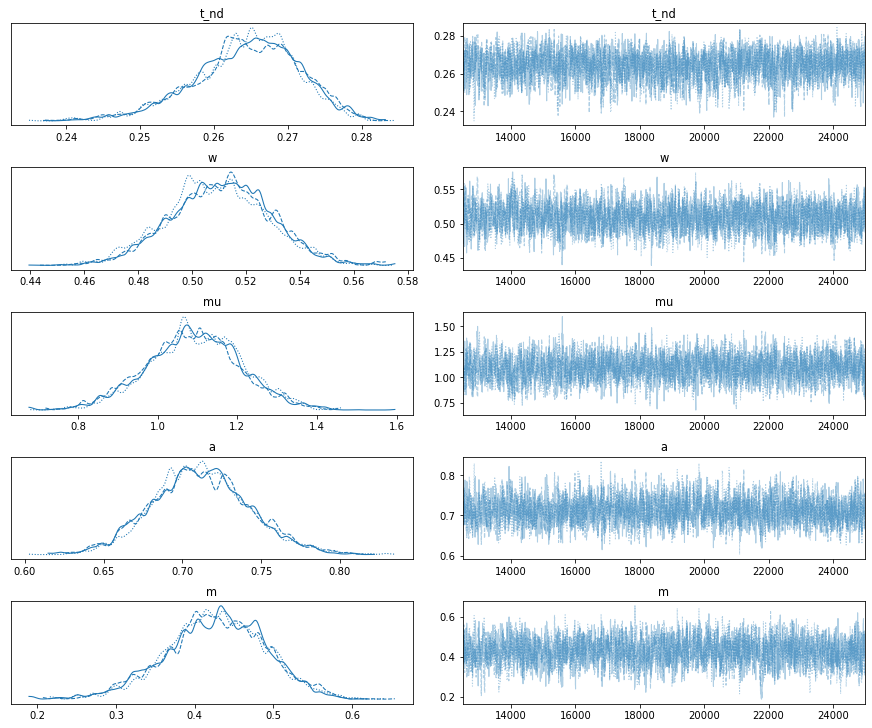

In [5]:
# plot posteriors
pbd.plot_trace(file_name = 'linear', burnin = 12500);


In [6]:
# summary of posteriors
pbd.summary(file_name = 'linear', burnin = 12500)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
t_nd,0.264,0.007,0.251,0.277,0.000,0.000,1537.0,2036.0,1.0
w,0.510,0.019,0.476,0.546,0.000,0.000,1677.0,2083.0,1.0
mu,1.093,0.117,0.879,1.322,0.003,0.002,1566.0,2593.0,1.0
a,0.712,0.031,0.657,0.771,0.001,0.001,1715.0,2455.0,1.0
m,0.427,0.063,0.312,0.547,0.002,0.001,1540.0,1655.0,1.0
